In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_1 = pd.read_csv("data1.csv",header = None)
data_2 = pd.read_csv("data2.csv",header = None)

In [3]:
data_1.head()

,0,1
0,0.10966,1.13380
1,1.12870,4.70060
2,-0.28996,-0.26487
3,1.26160,5.16540
4,0.47542,2.41400


In [4]:
def normalise(data):
    data = (data - data.min()) / (data.max() - data.min())
    return data

In [5]:
def get_xy(data):
    data = np.array(data)
    n = len(data[0])
    x = data[:,:n-1]
    y = data[:,n-1]
    return x,y

In [6]:
def hold_out(x,y,test_size):
    n = len(y)
    train_index = int(n*(1-test_size))
    x_train = x[:train_index,:]
    x_test = x[train_index:,:]
    y_train = y[:train_index]
    y_test = y[train_index:]
    return x_train, y_train ,x_test , y_test

In [7]:
def i_of_k_fold(x,i,k):
    n = len(x)
    l = list(range(n))
    train_index = l[0:n*(i-1)//k] + l[(n*i)//k:n]
    test_index = l[n*(i-1)//k : (n*i)//k ]
    return train_index , test_index

In [8]:
def gradient_decent(x,y,learning_rate,iteration):
    eps = 10**-2
    n= len(x[0])
    w = [0]*n
    w0 = 0
    m = len(x)
    w_list = [ ]
    for i in range(iteration):
        y_predicted = np.dot(x,w)+w0
        dy = y_predicted - y
        dw0 = np.sum(dy)
        dw = (1/m)*np.dot(dy,x)
        w = w - learning_rate*dw
        w0 = w0 -learning_rate*dw0
    return w,w0

In [9]:
def linear_reg(x,y,learning_rate,iteration):
    eps = 10**-10
    n= len(x[0])
    w = [0]*n
    w0 = 0
    m = len(x)
    cost_list = [ ]
    w_list = [ ]
    for i in range(iteration):
        y_predicted = np.dot(x,w)+w0
        cost = (1/(2*m))* np.sum(np.square(y-y_predicted))
        cost_list.append(cost)
        dy = y_predicted - y
        dw0 = np.sum(dy)
        dw = (1/m)*np.dot(dy,x)
        w = w - learning_rate*dw
        w0 = w0 -learning_rate*dw0
        w_list.append(list(w)+[w0])
        if cost <eps:
            break
    print(f"Final Values :\n w = {w} w0 = {w0} cost = {cost} ")
    return cost_list,w_list,w,w0

## 1(d)Describe the cross validation techniques used...
#### As we have to performe Kfold-cross validation Technique before LinearRegrssion so I am answering This Question Here..

In [10]:
## Mean error function is for determine the avarage error between predicted data and actual data.
def mean_error(x_test,y_test,w,w0):
    y_predicted = np.dot(x_test,w) + w0
    error = (1/len(x_test))*np.sum(np.square(y_predicted - y_test))
    return error

### Kfold cross validation for finding hyperparameter

In [11]:
def k_fold(x_train,y_train,k):
    learning_rate_range = [10**i for i in range(-5,3)]
    mean_error_coresponding_to_LearningRate = dict()
    for lr in learning_rate_range:
        each_fold_error = [ ]
        for i in range(1,k+1):
            train_index , test_index = i_of_k_fold(x_train,i,k)
            w,w0 = gradient_decent(x_train[train_index],y_train[train_index],lr,iteration = 30)
            each_fold_error.append(mean_error(x_train[test_index],y_train[test_index],w,w0))

        mean_error_coresponding_to_LearningRate[lr] = sum(each_fold_error)/len(each_fold_error)
    return mean_error_coresponding_to_LearningRate

## 1. Analysing data1

In [12]:
x,y = get_xy(data_1)  ## Separate x and y value from data
x_train, y_train ,x_test , y_test = hold_out(x,y,0.3)  ## spliting into train and test data (holdout method).
##finding avarage error with respect to each learning rate
mean_error_coresponding_to_LearningRate = k_fold(x_train,y_train,10)  
mean_error_coresponding_to_LearningRate

{1e-05: 11.198438161191849,
 0.0001: 10.830238293542479,
 0.001: 10.054910267155021,
 0.01: 6.359717796244741,
 0.1: 5.361575087885115e+63,
 1: 4.7467381874358936e+125,
 10: 7.300230888164399e+185,
 100: 7.62003868339306e+245}

### Here we got minimum error at 0.01 learning rate , So we can conclude optimal learning rate should be near 0.01

### Apply Linear Regression

In [13]:
cost_list_d1,w_list_d1,w_d1,w0_d1 = linear_reg(x_train,y_train,0.01,1000)

Final Values :
 w = [3.4993796] w0 = 0.7500210439207416 cost = 1.7225646647001432e-07 


### Testing model Performance

In [14]:
error = mean_error(x_test,y_test,w_d1,w0_d1)
error

3.101123867342219e-07

#### As error is very less we can say our model is good

## Analysing data2

In [15]:
data_2.head()

,0,1,2
0,95,125,35
1,583,181,1387
2,575,283,1159
3,292,139,598
4,481,507,429


In [25]:
x,y = get_xy(data_2)  ## Separate x and y value from data
x_train_2, y_train_2 ,x_test_2, y_test_2 = hold_out(x,y,0.3)  ## spliting into train and test data (holdout method).
##finding avarage error with respect to each learning rate
mean_error_coresponding_to_LearningRate = k_fold(x_train_2,y_train_2,10)  
mean_error_coresponding_to_LearningRate

C:\Users\adity_000\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


{1e-05: 2390638.025254215,
 0.0001: 2.5819400839898358e+82,
 0.001: 3.848147105634365e+143,
 0.01: 5.008926908894051e+203,
 0.1: 5.142408080565869e+263,
 1: inf,
 10: inf,
 100: inf}

#### Here we are getting huge error so have to normalise the data..

In [23]:
n_data_2 = normalise(data_2)
x,y = get_xy(n_data_2)  ## Separate x and y value from data
x_train_2, y_train_2 ,x_test_2 , y_test_2 = hold_out(x,y,0.3)  ## spliting into train and test data (holdout method).
##finding avarage error with respect to each learning rate
mean_error_coresponding_to_LearningRate = k_fold(x_train_2,y_train_2,10)  
mean_error_coresponding_to_LearningRate

{1e-05: 0.3256728908793096,
 0.0001: 0.19487202048661056,
 0.001: 0.06287867894580937,
 0.01: 0.05997033235595887,
 0.1: 2.6762974201214317e+63,
 1: 2.3282259581939364e+125,
 10: 3.574908887684177e+185,
 100: 3.7309202087440696e+245}

#### Here we are getting minimum error coresponding to 0.01 learning rate..

## Apply linear regression

In [24]:
cost_list_d2,w_list_d2, w_d2 ,w0_d2 = linear_reg(x_train_2,y_train_2,0.012,1000)

Final Values :
 w = [ 0.45969008 -0.29860415] w0 = 0.44942888665458974 cost = 0.003864695024520081 


# Assignment

### 1(a) Plot J(w ) against iteration

###   For data1

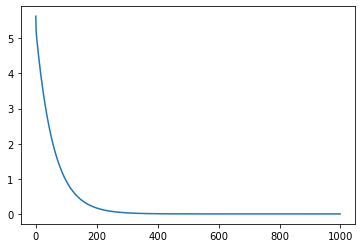

In [25]:
i = list(range(len(cost_list_d1)))
plt.plot(i,cost_list_d1)

### For data 2

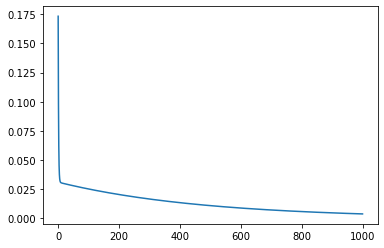

In [26]:
i = list(range(len(cost_list_d2)))
plt.plot(i,cost_list_d2)

### 1(b) Plot J(w ) against w for data1.

[]

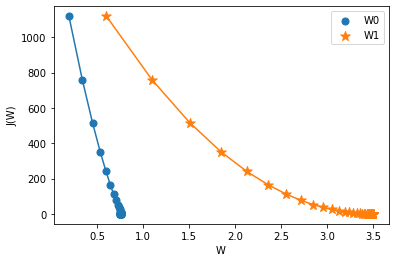

In [11]:
plt.xlabel("W")
plt.ylabel("J(W)")
w1_d1 = np.array(w_list_d1)[:,0]
w2_d1 = np.array(w_list_d1)[:,1]
plt.scatter(w1_d1,cost_list_d1,s=50,label='W0')
plt.scatter(w2_d1,cost_list_d1,s=100,marker="*",label='W1')
plt.plot(w2_d1,cost_list_d1)
plt.plot(w2_d1,cost_list_d1)
plt.legend()
plt.plot()

### 1(c) Plot the hyperplane obtained. In the same figure, plot the output points also..

[]

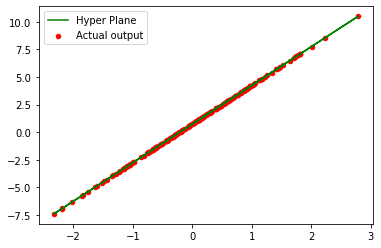

In [27]:
hyp_pln = data_1[0]*w_d1+w0_d1
plt.plot(data_1[0],hyp_pln,"g",label="Hyper Plane")
plt.scatter(data_1[0],data_1[1],c = "r",s=20 , label="Actual output")
plt.legend()
plt.plot()


### 1(d) Describe the cross validation techniques used.

### 1(e) Report the average mean square error and standard deviation

In [28]:
def avg_mse(x_test,y_test,w,w0):
    y_predicted = np.dot(x_test,w) + w0
    return np.square(y_predicted-y_test)

In [29]:
mse_d1 = avg_mse(x_test,y_test,w_d1,w0_d1)
mse_d2 = avg_mse(x_test_2,y_test_2,w_d2,w0_d2)
print("Average MSE FOR DATA 1 : ", mse_d1.mean())
print("Average MSE FOR DATA 2 : ", mse_d2.mean())

print("Standard deviation for data_1 : ", mse_d1.std())
print("Standard deviation for data_2 : ", mse_d2.std())

Average MSE FOR DATA 1 :  9.941763436337057
Average MSE FOR DATA 2 :  0.006343932870273018
Standard deviation for data_1 :  12.609011596843297
Standard deviation for data_2 :  0.007542562504182648


### 1(f) Report the parameters of the model

In [25]:
print("For data 1 Coefficients are :",w_d1," and Intercept is :",w0_d1)
print("For data 2 Coefficients are :",w_d2," and Intercept is :",w0_d2)

For data 1 Coefficients are : [3.4993796]  and Intercept is : 0.7500210439207416
For data 2 Coefficients are : [ 0.45969008 -0.29860415]  and Intercept is : 0.44942888665458974
